In [18]:
import os
import numpy as np

from numpy.polynomial import Polynomial


import matplotlib.pyplot as plt

In [9]:
calib_dict = {'10': 7,
              '20': 8,
              '30': 9,
              '40': 11,
              '50': 14,
              '60': 19,
              '70': 25,
              '80': 34,
              '90': 45,
              '100': 60}

Text(0, 0.5, 'Light intensity - mW/mm2 ')

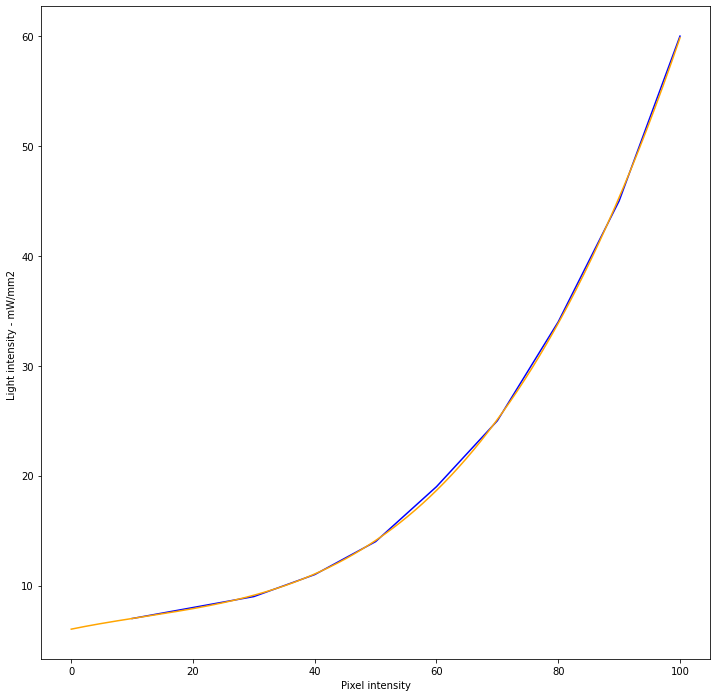

In [28]:
# Find a polynomial fit for the power function
plt.figure(figsize=(12, 12))

data_pts = [int(k) for k in calib_dict]
powers = [v for v in calib_dict.values()]

poly = Polynomial.fit(data_pts, powers, 3)
x = np.linspace(0, 100, 1000)
y = poly(x)

plt.plot(data_pts, powers, color='b')
plt.plot(x, y, color='orange')

plt.xlabel('Pixel intensity')
plt.ylabel('Light intensity - mW/mm2 ')

In [74]:
# Find closest value of image and convert it
# Set the minimum for optogenetic activation (may need to be determined from neurometrics)
min_acti = 10

path = '/home/pouple/PhD/Code/Dimmy/Stims/PT_6000Hz_500ms_70dB_latent.npy'
img = np.load(path) / 255 # Convert from bmp
active_units = img[img != 0] # Only compute active units
active_units = min_acti + active_units * (np.max(powers) - min_acti) # Normalize
idx_powers = [np.argmin(np.abs(y - a)) for a in active_units]
img[img != 0] = x[idx_powers] * 2.55
#np.save('normalized_stim.npy', img)